# The Wilson-Cowan model

In this notebook, the basic use of the implementation of the Wilson-Cowan (`wc`) model is presented. 

In the `wc` model, the activity of a particular brain region is defined by a coupled system of excitatory (E) and inhibitory (I) neuronal populations with the mean firing rates of the E and I pools being the dynamic variables, as first described by Wilson and Cowan in 1972 ( H.R. Wilson and J.D. Cowan. *Excitatory and inhibitory interactions in localized populations of model neurons*. Biophys. J., 12:1–24 (1972)) 

In [1]:
# change to the root directory of the project
import os
if os.getcwd().split("/")[-1] == "examples":
    os.chdir('..')

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import glob

from neurolib.models.wc import WCModel

import neurolib.utils.loadData as ld
import neurolib.utils.functions as func

# Single node simulation

In [4]:
wc = WCModel()
wc.params['duration'] = 1.0*1000
wc.params['sigma_ou'] = 0.3

wc.run()

Text(0,0.5,'Activity')

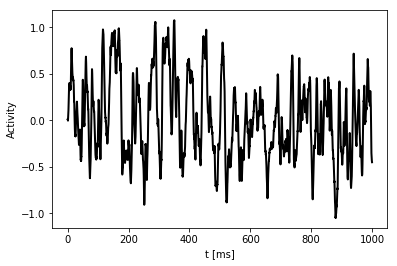

In [6]:
plt.plot(wc.t, wc.e.T, c='k', lw = 2)
plt.xlabel("t [ms]")
plt.ylabel("Activity")

# Brain network

In [7]:
from neurolib.utils.loadData import Dataset

ds = Dataset("hcp")

In [8]:
wc = WCModel(Cmat = ds.Cmat, Dmat = ds.Dmat)

In [9]:
wc.params['w'] = 1.0
wc.params['signalV'] = 0
wc.params['duration'] = 20 * 1000 
wc.params['sigma_ou'] = 0.14
wc.params['K_gl'] = 3.15


wc.run(chunkwise=True)

Text(0.5,0,'t [ms]')

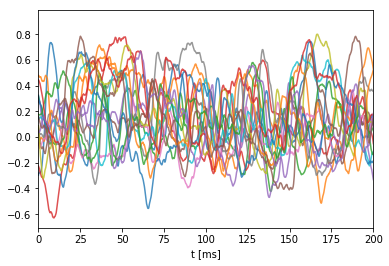

In [10]:
plt.plot(wc.t, wc.e[::5, :].T, alpha=0.8);
plt.xlim(0, 200)
plt.xlabel("t [ms]")

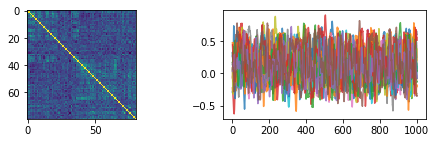

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(8, 2))
axs[0].imshow(func.fc(wc.e[:, -10000:]))
axs[1].plot(wc.t, wc.e[::5, :].T, alpha=0.8);

In [12]:
scores = []
for i in range(len(ds.FCs)):
    fc_score = func.matrix_correlation(func.fc(wc.e[:, -int(5000/wc.params['dt']):]), ds.FCs[i])
    scores.append(fc_score)
    print("Dataset {} correlation: {:.2f}". format(i, fc_score))
print("Mean FC/FC correlation: {:.2f}".format(np.mean(scores)))

Dataset 0 correlation: 0.30
Dataset 1 correlation: 0.33
Dataset 2 correlation: 0.31
Dataset 3 correlation: 0.29
Dataset 4 correlation: 0.29
Dataset 5 correlation: 0.27
Dataset 6 correlation: 0.29
Mean FC/FC correlation: 0.30
